## 2.1

In [161]:
import pandas as pd
import matplotlib.pyplot as plt

df_umd = pd.read_excel("/Users/jacopomichelacci/FINM_32500/data/momentum_data.xlsx", sheet_name="momentum (excess returns)", index_col="Date")
df_factors = pd.read_excel("/Users/jacopomichelacci/FINM_32500/data/momentum_data.xlsx", sheet_name="factors (excess returns)", index_col="Date")
df_all = pd.merge(df_umd, df_factors, left_index=True, right_index=True, how="inner")

umd_ser = df_all[["UMD"]]

date_1993 = "1993-12-31 00:00:00"
date_2008 = "2008-12-31 00:00:00"
date_2009 = "2009-01-31 00:00:00"

tots = umd_ser
subs_93 = umd_ser[:date_1993]
subs_08 = umd_ser[date_1993:date_2008]
subs_24 = umd_ser[date_2009:]

sample_list = [tots, subs_93, subs_08, subs_24]

mean_r = []
vol_r = []
sharpe = []
skewness = []
corr_mkt = []
corr_hml = []

for subs in sample_list:
    mean_r.append(float(subs.mean().iloc[0]) * 12)
    vol_r.append(float(subs.std().iloc[0]) * (12 ** 0.5))
    sharpe.append(mean_r[-1] / vol_r[-1])
    skewness.append(float(subs.skew().iloc[0]))
    corr_mkt.append(subs["UMD"].corr(df_all["MKT"]))
    corr_hml.append(subs["UMD"].corr(df_all["HML"]))


results = pd.DataFrame({
    "mean_r" : mean_r,
    "vol_r" : vol_r,
    "sharpe" : sharpe,
    "skew" : skewness,
    "corr_MKT" : corr_mkt,
    "corr_HML" : corr_hml
})
results.index = ["1924-2024", "1924-93", "1993-08", "2009-24"]

print(results)



             mean_r     vol_r    sharpe      skew  corr_MKT  corr_HML
1924-2024  0.073109  0.162364  0.450276 -3.062415 -0.347742 -0.410478
1924-93    0.088136  0.160513  0.549089 -3.911021 -0.367499 -0.500962
1993-08    0.103710  0.174930  0.592868 -0.602372 -0.239611 -0.119876
2009-24   -0.013962  0.155914 -0.089550 -2.676247 -0.358740 -0.325477


2.1 
b)
momentum has changed over time, especially in the last 2 decades, the mean return is negative and almost equal to 0

c)
even if the return of the momentum factor in the most recent subsample are near 0 it still provides a valuable benefit as is it negatively correlated to both the market and the value factor

## 2.2 long only implementation

a)


subsample 1994-2024:

             mean_r     vol_r    sharpe      skew  corr_MKT  corr_HML
UMD        0.073089  0.162369  0.450142 -3.062167 -0.347734 -0.410449
Long-Only  0.133166  0.211234  0.630416 -0.054328  0.935804  0.210711 



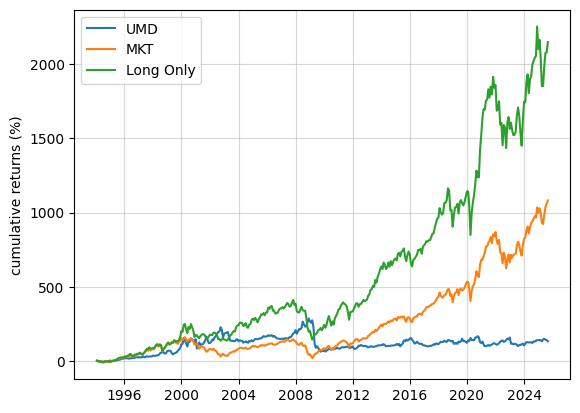

In [162]:
df_ssort = pd.read_excel("/Users/jacopomichelacci/FINM_32500/data/momentum_data.xlsx", sheet_name="size_sorts (total returns)", index_col="Date")
df_dec_sort = pd.read_excel("/Users/jacopomichelacci/FINM_32500/data/momentum_data.xlsx", sheet_name="deciles (total returns)", index_col="Date")
df_rf = pd.read_excel("/Users/jacopomichelacci/FINM_32500/data/momentum_data.xlsx", sheet_name="risk-free rate", index_col="Date")

#exc rets
df_ssort = df_ssort.sub(df_rf["RF"], axis=0)

#long and short
momFF = (1/2) * (df_ssort["BIG HiPRIOR"] + df_ssort["SMALL HiPRIOR"]) - (1/2) * (df_ssort["BIG LoPRIOR"] + df_ssort["SMALL LoPRIOR"])
#only long rets
momOL = (1/2) * (df_ssort["BIG HiPRIOR"] + df_ssort["SMALL HiPRIOR"])

date_1994 = "1994-01-31 00:00:00"
subs_94_24 = df_ssort[date_1994:]

def stats(ret_series):
    s = ret_series
    results = {
        "mean_r" : s.mean() * 12,
        "vol_r" : s.std() * (12 ** 0.5),
        "sharpe" : (s.mean() * 12) / (s.std() * (12 ** 0.5)),
        "skew" : s.skew(),
        "corr_MKT" : s.corr(df_all["MKT"]),
        "corr_HML" : s.corr(df_all["HML"])
    }

    return results

print("\nsubsample 1994-2024:\n")

results = pd.DataFrame([stats(momFF), stats(momOL)])
results.index = ["UMD", "Long-Only"]

print(results, "\n")

cp_umd = ((1 + momFF[date_1994:]).cumprod() - 1) * 100
cp_umdOL = ((1 + momOL[date_1994:]).cumprod() - 1) * 100
cp_mkt = ((1 + df_all["MKT"][date_1994:]).cumprod() - 1) * 100


#plot
plt.plot(cp_umd.index, cp_umd, label="UMD")
plt.plot(cp_mkt.index, cp_mkt, label="MKT")
plt.plot(cp_umdOL.index, cp_umdOL, label="Long Only")

plt.ylabel("cumulative returns (%)")

plt.grid(alpha=0.5)
plt.legend()
plt.show()



b-c)
Long Only momentum is actually more attractive if we only consider the sharpe ratio, though if we take into consideration the correlation with market and value index long and short gives us much more opportunities to diversify our portfolio as it is negatively correlated with both, while long only is almost perfectly correlated to market returns.

## 2.3

In [163]:
#exc rets
df_dec_sort = df_dec_sort.sub(df_rf["RF"], axis=0)
df_dec_sort = df_dec_sort[date_1994:]

mom_D1 = (df_dec_sort["Hi PRIOR"] - df_dec_sort["Lo PRIOR"])
mom_D3 = (1/3) * (df_dec_sort["Hi PRIOR"] + df_dec_sort["PRIOR 9"] + df_dec_sort["PRIOR 8"]) - (1/3) * (df_dec_sort["Lo PRIOR"] + df_dec_sort["PRIOR 2"] + df_dec_sort["PRIOR 3"])
mom_D5 = (1/5) * (df_dec_sort["Hi PRIOR"] + df_dec_sort["PRIOR 9"] + df_dec_sort["PRIOR 8"] + df_dec_sort["PRIOR 7"] + df_dec_sort["PRIOR 6"]) - (1/5) * (df_dec_sort["Lo PRIOR"] + df_dec_sort["PRIOR 2"] + df_dec_sort["PRIOR 3"] + df_dec_sort["PRIOR 4"] + df_dec_sort["PRIOR 5"])

results = pd.DataFrame([stats(mom_D1), stats(mom_D3), stats(mom_D5), stats(df_all["UMD"])])
results.index = ["mom_D1", "mom_D3", "mom_D5", "UMD"]

print(results)




          mean_r     vol_r    sharpe      skew  corr_MKT  corr_HML
mom_D1  0.074195  0.298661  0.248425 -1.271370 -0.320216 -0.245515
mom_D3  0.026747  0.193075  0.138534 -1.319554 -0.354271 -0.220957
mom_D5  0.015525  0.133542  0.116254 -1.407710 -0.348999 -0.214293
UMD     0.073109  0.162364  0.450276 -3.062415 -0.347742 -0.410478


b) we can see that the portfolio with the long short of the highest and lowest deciles has the highest mean return and volatility, and similar correlations with the other portfolios

c) if i had to decide between one of the decile construction i would would go for the one wit the highest deciles "mom_D1" because the correlations to market and value returns are almost identical to other porfolios but D1 has a higehr sharpe.

d) ? where is the FF3model table? ?

## 2.4

In [164]:
df_ssort_94 = df_ssort[date_1994:]

momS = df_ssort_94["SMALL HiPRIOR"] - df_ssort_94["SMALL LoPRIOR"]
momB = df_ssort_94["BIG HiPRIOR"] - df_ssort_94["BIG LoPRIOR"]

results = pd.DataFrame([stats(momFF), stats(momS), stats(momB)])
results = results.drop(["corr_HML"], axis=1)
results.index = ["all stocks", "small stock", "big stocks"]

print(results)

               mean_r     vol_r    sharpe      skew  corr_MKT
all stocks   0.073089  0.162369  0.450142 -3.062167 -0.347734
small stock  0.061797  0.167692  0.368514 -1.813338 -0.309372
big stocks   0.020773  0.181850  0.114229 -0.855287 -0.272719


b) the small stock porfolio has a sharpe that is 3 times the big one and is also more negatively correlated to the mkt returns compared to the big stock portfolio, so yes momentum strategy performance is attractive mainly because of small stocks.

 ## 2.5

 the FF model has lower sharpe but the main difference between the UMD and the long only AQR product is the correlation to market and value returns, that is significant in AQR's product.